# Forecasting weather 

<i>You work as a data scientist with a small team of data scientists for a cargo shipping company based in Finland. 90% of goods are imported into Finland via cargo shipping. You are tasked with saving 20% of the costs for cargo operations at the port of Turku, Finland. This can be achieved by developing an ML solution that predicts weather conditions at the port 4 hours in advance. You need to monitor for possible rainy conditions, which can distort operations at the port with human resources and transportation, which in turn affects supply chain operations at the port. Your ML solution will help port authorities to predict possible rain 4 hours in advance; this will save 20% of costs and enable smooth supply chain operations at the port.</i><p>
Reference: Engineering MLOps, by Emmanuel Raj. O'Reilly

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

#import dataset, which can be downloaded from GitHub (http://github.com/amfarahani/ANA680)

df = pd.read_csv('C:\\Users\\amf\\Google Drive\\National\\ANA680\\DataSetSources\\weather_dataset_raw.csv')


In [2]:
df.columns # List column names

Index(['S_No', 'Timestamp', 'Location', 'Temperature_C',
       'Apparent_Temperature_C', 'Humidity', 'Wind_speed_kmph',
       'Wind_bearing_degrees', 'Visibility_km', 'Pressure_millibars',
       'Weather_conditions'],
      dtype='object')

In [3]:
df.shape # Number of columns (features) and records (observations)

(96453, 11)

In [4]:
df.head(3) # Inspect feature values

,S_No,Timestamp,Location,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Weather_conditions
0,0,2006-04-01 00:00:00+02:00,"Port of Turku, Finland",9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,rain
1,1,2006-04-01 01:00:00+02:00,"Port of Turku, Finland",9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,rain
2,2,2006-04-01 02:00:00+02:00,"Port of Turku, Finland",9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,rain


In [5]:
df.info() # Inspect data types and existence of null values. Null values in feature "Weather_conditions"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S_No                    96453 non-null  int64  
 1   Timestamp               96453 non-null  object 
 2   Location                96453 non-null  object 
 3   Temperature_C           96453 non-null  float64
 4   Apparent_Temperature_C  96453 non-null  float64
 5   Humidity                96453 non-null  float64
 6   Wind_speed_kmph         96453 non-null  float64
 7   Wind_bearing_degrees    96453 non-null  int64  
 8   Visibility_km           96453 non-null  float64
 9   Pressure_millibars      96453 non-null  float64
 10  Weather_conditions      96448 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 8.1+ MB


In [6]:
df.describe() # Examine statistics of numeric features. Check values

,S_No,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,48226.000000,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,27843.727094,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,0.000000,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24113.000000,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,48226.000000,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,72339.000000,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,96452.000000,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [7]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])# feature "Timestamp" must be converted to datetime object

In [8]:
df['Timestamp'].head(2)

0    2006-04-01 00:00:00+02:00
1    2006-04-01 01:00:00+02:00
Name: Timestamp, dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S_No                    96453 non-null  int64  
 1   Timestamp               96453 non-null  object 
 2   Location                96453 non-null  object 
 3   Temperature_C           96453 non-null  float64
 4   Apparent_Temperature_C  96453 non-null  float64
 5   Humidity                96453 non-null  float64
 6   Wind_speed_kmph         96453 non-null  float64
 7   Wind_bearing_degrees    96453 non-null  int64  
 8   Visibility_km           96453 non-null  float64
 9   Pressure_millibars      96453 non-null  float64
 10  Weather_conditions      96448 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 8.1+ MB


In [10]:
df.isnull().values.any() # Check if the dataset has any null values

True

In [11]:
df.isna().sum()  # How many null values?  Five null values in the "Weather_condition" feature.

S_No                      0
Timestamp                 0
Location                  0
Temperature_C             0
Apparent_Temperature_C    0
Humidity                  0
Wind_speed_kmph           0
Wind_bearing_degrees      0
Visibility_km             0
Pressure_millibars        0
Weather_conditions        5
dtype: int64

In [12]:
df.loc[pd.isnull(df).any(1), :].index.values  # index of rows with NA

array([    3,   116,   222, 94717, 94722], dtype=int64)

In [13]:
df.iloc[[    3,   116,   222, 94717, 94722]]  # Verify!

,S_No,Timestamp,Location,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Weather_conditions
3,3,2006-04-01 03:00:00+02:00,"Port of Turku, Finland",8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,NaN
116,116,2006-04-13 20:00:00+02:00,"Port of Turku, Finland",8.072222,6.433333,0.75,9.5151,150,9.9820,1010.91,NaN
222,222,2006-04-18 06:00:00+02:00,"Port of Turku, Finland",6.627778,6.627778,0.96,3.3005,313,2.9302,1012.75,NaN
94717,39532,2010-06-12 04:00:00+02:00,"Port of Turku, Finland",20.933333,20.933333,0.90,3.0751,112,14.9086,1010.35,NaN
94722,39537,2010-06-12 09:00:00+02:00,"Port of Turku, Finland",27.827778,30.527778,0.72,8.0822,184,9.9820,1010.53,NaN


In [14]:
# Fill missing values with fillna, forward fill method, missing value is filled with preceding non-missing value
df['Weather_conditions'].fillna(method='ffill', inplace=True) 

In [15]:
df.iloc[[    3,   116,   222, 94717, 94722]]

,S_No,Timestamp,Location,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Weather_conditions
3,3,2006-04-01 03:00:00+02:00,"Port of Turku, Finland",8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,rain
116,116,2006-04-13 20:00:00+02:00,"Port of Turku, Finland",8.072222,6.433333,0.75,9.5151,150,9.9820,1010.91,rain
222,222,2006-04-18 06:00:00+02:00,"Port of Turku, Finland",6.627778,6.627778,0.96,3.3005,313,2.9302,1012.75,rain
94717,39532,2010-06-12 04:00:00+02:00,"Port of Turku, Finland",20.933333,20.933333,0.90,3.0751,112,14.9086,1010.35,clear
94722,39537,2010-06-12 09:00:00+02:00,"Port of Turku, Finland",27.827778,30.527778,0.72,8.0822,184,9.9820,1010.53,clear


In [16]:
# Since only interested in rain, no-rain conditions, map snow and clear values to no_rain
df['Weather_conditions'].replace({"snow": "no_rain", "clear": "no_rain"}, inplace=True)

In [17]:
# Encode rain, no_rain to 1, 0, place in series y.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = df['Weather_conditions']
y = le.fit_transform(y)

In [18]:
df['Weather_conditions']

0           rain
1           rain
2           rain
3           rain
4           rain
          ...   
96448    no_rain
96449    no_rain
96450    no_rain
96451    no_rain
96452    no_rain
Name: Weather_conditions, Length: 96453, dtype: object

In [19]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [20]:
# insert series y as a new column with heading "Weather_condition" in the dataframe, 
# remove the "Weather condition" feature/column
y = pd.DataFrame(data=y, columns=["Weather_condition"])
df = pd.concat([df,y], axis=1)
df.drop(['Weather_conditions'], axis=1, inplace=True)

In [21]:
df. head(2)

,S_No,Timestamp,Location,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Weather_condition
0,0,2006-04-01 00:00:00+02:00,"Port of Turku, Finland",9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,1
1,1,2006-04-01 01:00:00+02:00,"Port of Turku, Finland",9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,1


In [22]:
# Since interested in forcating weather four hours ahead, must shift Weather_condition column down. Let's inspect the effect 
# Before updatign the dataframe
df.Weather_condition.shift(4, axis=0)

0        NaN
1        NaN
2        NaN
3        NaN
4        1.0
        ... 
96448    0.0
96449    0.0
96450    0.0
96451    0.0
96452    0.0
Name: Weather_condition, Length: 96453, dtype: float64

In [23]:
# Define a new feature "Future_weather_conditon" in that dataframe that holds the shifted column. use dropna() to 
# Remove all rows with NA
df['Future_weather_condition'] = df.Weather_condition.shift(4) 
df.dropna(inplace=True)

In [24]:
df.head(2)

,S_No,Timestamp,Location,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Weather_condition,Future_weather_condition
4,4,2006-04-01 04:00:00+02:00,"Port of Turku, Finland",8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,1,1.0
5,5,2006-04-01 05:00:00+02:00,"Port of Turku, Finland",9.222222,7.111111,0.85,13.9587,258,14.9569,1016.66,1,1.0


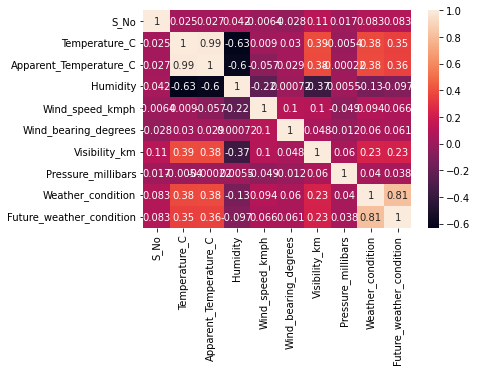

In [25]:
# Inspect correlation among features. High correlation between Temperature_c and Apprent_Temperature_C. 
# These are similar feature, we will drop one.  S_No represents the serial number, which can be removed as well.
df.corr(method="pearson")
# Visualizing using heatmap
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)  
plt.show()

In [26]:
df.drop(['S_No', 'Apparent_Temperature_C'], axis=1, inplace=True)

In [27]:
df.head(2)

,Timestamp,Location,Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Weather_condition,Future_weather_condition
4,2006-04-01 04:00:00+02:00,"Port of Turku, Finland",8.755556,0.83,11.0446,259,15.8263,1016.51,1,1.0
5,2006-04-01 05:00:00+02:00,"Port of Turku, Finland",9.222222,0.85,13.9587,258,14.9569,1016.66,1,1.0


In [28]:
# Data is now considered clean. We should save a copy of this dataset and version it.
df.to_csv('C:\\Users\\amf\\Google Drive\\National\\ANA680\week1\\weatherData_cleaned.csv')

In [29]:
df.shape

(96449, 10)

In [30]:
# Save 100 rows in dataframe df2 for deployment testing. Remove these rows from dataframe df.
np.random.seed(1)
# generate some integers
values = np.random.randint(1, df.shape[0], 100)
df2= df.iloc[values] 
df.drop(values,axis=0, inplace=True)

In [31]:
# Ready for Model training. Feature to be used for predicting are in X and the target feature is placed in y
X = df[['Temperature_C', 'Humidity', 'Wind_speed_kmph', 'Wind_bearing_degrees', 'Visibility_km', 'Pressure_millibars', 'Weather_condition']].values
y = df['Future_weather_condition'].values.astype(int)

In [32]:
df.shape

(96349, 10)

In [33]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [34]:
# Split data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [35]:
# As seen in the dataframe we have features such as pressure with values in one thousand range and feature such 
# as humidity with values between 0 and 1. Use standard scaler to scale data to mean 0 and STD of 1.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test) 

In [36]:
X_test

array([[ 0.18615542,  0.38447094, -0.57102977, ...,  1.09135425,
         0.05289583,  0.41455518],
       [-0.89815466, -0.12678091, -0.07503775, ...,  1.09135425,
         0.11034429,  0.41455518],
       [-0.9564509 , -0.84253349,  2.41190817, ..., -0.08729319,
        -8.37115301,  0.41455518],
       ...,
       [-1.68398798,  0.99797316, -0.21941101, ..., -2.28819794,
         0.19701799, -2.41222412],
       [-0.54779425,  0.58897168,  0.40698267, ...,  0.45053623,
         0.11401832,  0.41455518],
       [ 0.99006057,  0.28222057, -0.75731786, ...,  1.23248679,
         0.04788579, -2.41222412]])

In [37]:
# we can save the test data as csv, as well
np.savetxt('C:\\Users\\amf\\Google Drive\\National\\ANA680\week1\\X_test.csv', X_test, delimiter=",")

# Modeling 1: Support Vector Machine

In [38]:
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
svm =  SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("The MSE on test set is {0:.4f}".format(mean_squared_error(y_test, y_pred)))

The MSE on test set is 0.0461


In [39]:
y_pred

array([1, 1, 1, ..., 0, 1, 0])

In [40]:
# measure of accuracy, precision, recall, and f1-score
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 2363   425]
 [  463 16019]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      2788
           1       0.97      0.97      0.97     16482

    accuracy                           0.95     19270
   macro avg       0.91      0.91      0.91     19270
weighted avg       0.95      0.95      0.95     19270



Let's see how the model will predict the 'Future_weather_condition' for the 100 rows we put aside.

In [47]:
X2 = df2[['Temperature_C', 'Humidity', 'Wind_speed_kmph', 'Wind_bearing_degrees', 'Visibility_km', 'Pressure_millibars', 'Weather_condition']].values
y2=df2['Future_weather_condition'].values.astype(int)
X2=sc.fit_transform(X2)
#y2=sc.transform(y2)
y2_pred = svm.predict(X2)
print("The MSE on test set is {0:.4f}".format(mean_squared_error(y2, y2_pred)))
print(confusion_matrix(y2,y2_pred))
print(classification_report(y2,y2_pred))

The MSE on test set is 0.0700
[[11  1]
 [ 6 82]]
              precision    recall  f1-score   support

           0       0.65      0.92      0.76        12
           1       0.99      0.93      0.96        88

    accuracy                           0.93       100
   macro avg       0.82      0.92      0.86       100
weighted avg       0.95      0.93      0.94       100



# Modeling 2: Random Forest classifier: 
Random Forest is an ensemble learning method that operates with a multitude of decision trees.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier (max_depth=10, random_state=0, n_estimators=100)

#Train the model using the training sets y_pred=rfc.predict(X_test)
rfc.fit(X_train,y_train)

y_pred=rfc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))